Goals of this notebook:
* Introduce gradient descent intuition
* Play with learning rate
* Play with  initial condition
* Introduce Newton's method intuition
* Play with initial guess

Include references, maybe mention other themes in optmization
methods with links (stochastic GD, quasi-newton, CG, constrained, ???)

What are some of the popular options for learning models in sklearn?
Maybe give some brief info?
Explain why first-order methods more popular in ML
* Expensive to compute Hessian
* Even GD expensive for large models -> SGD

Choosing learning rate:
* trust-region vs. line-search
* learning rate schedule for SGD

Variance reduction for SGD

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import utils

Include description of gradient descent

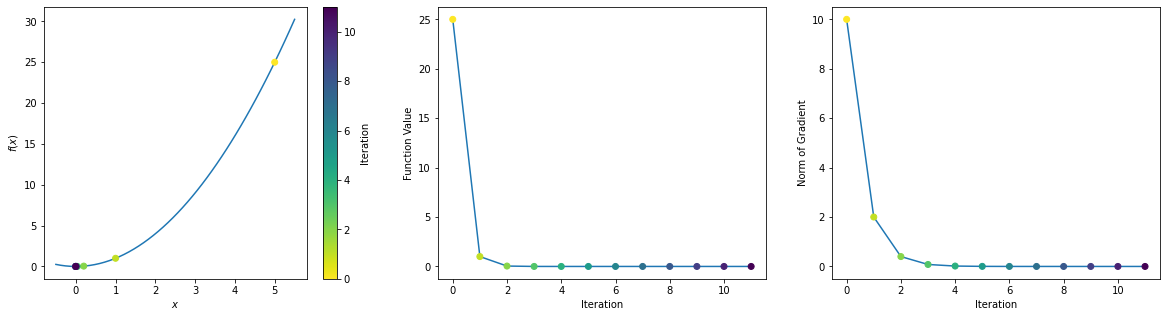

In [20]:
# Minimize function
x0 = 5
func = lambda x: x**2
grad = lambda x: 2*x
step = 0.4
results = utils.gradient_descent(x0, func, grad, step)
utils.plot_1d(func, results)

# Possible questions for them to investigate:
# * Try changing the step size in the range (0, 1] to see what happens.
# * Are there any step sizes that can find the minimum in one step? (0.5)
# * Are there any step sizes that result in a cycle? (1)
# * What happens if the step size is too small?
# * What happens if the step size is too big?

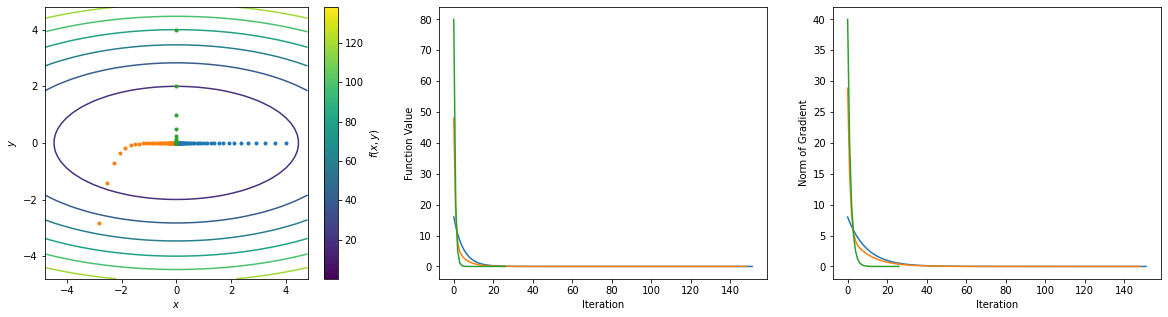

In [90]:
# Set up problem
step = 0.05
func = lambda x: x[0]**2 + 5*x[1]**2
grad = lambda x: np.array([2*x[0], 10*x[1]])

# one step: 0.1
# cycle: 0.2

x0 = [[4, 0], [-2*np.sqrt(2), -2*np.sqrt(2)], [0, 4]]
results = [utils.gradient_descent(x0[ii], func, grad, step) for ii in range(len(x0))]
utils.plot_2d(lambda x, y: x**2 + 5*y**2, results)
# What's the difference between the initial conditions?
# Why does one converge in less iterations than the other?

# Try other initial conditions to see what happens...

Introduce Newton's method

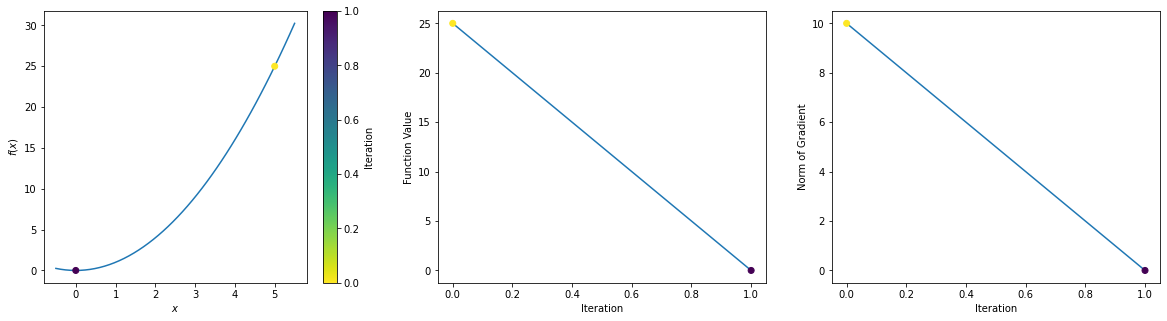

In [19]:
# Minimize function
x0 = 5
func = lambda x: x**2
grad = lambda x: 2*x
hess = lambda x: 2
results = utils.newtons_method(x0, func, grad, hess)
utils.plot_1d(func, results)

# Step size 1/f'' gives us solution in one step, like we found with step size = 1/2 previously

Number of iterations: 2
Number of iterations: 2
Number of iterations: 2


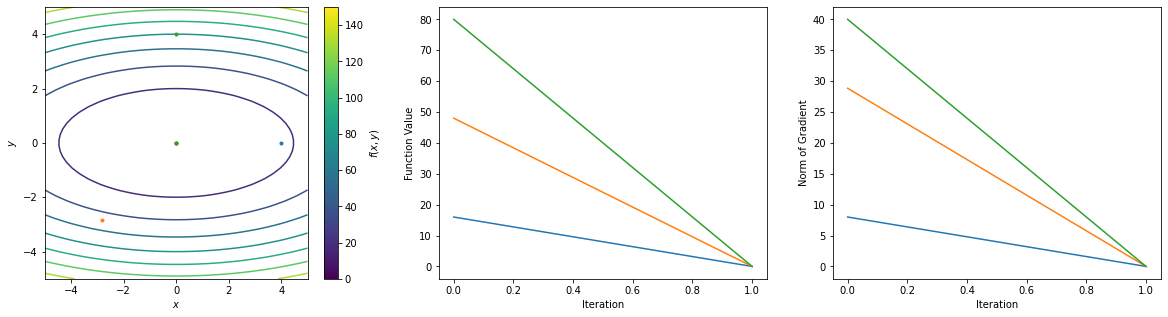

In [53]:
# Set up problem
step = 0.05
func = lambda x: x[0]**2 + 5*x[1]**2
grad = lambda x: np.array([2*x[0], 10*x[1]])


x0 = [[4, 0], [-2*np.sqrt(2), -2*np.sqrt(2)], [0, 4]]
results = [utils.newtons_method(x0[ii], func, grad, step) for ii in range(len(x0))]
utils.plot_2d(lambda x, y: x**2 + 5*y**2, results)


# # 2D example
# x_vals = np.linspace(-5, 5)
# y_vals = np.linspace(-5, 5)
# [X, Y] = np.meshgrid(x_vals, y_vals)

# # Plot set up
# fig, ax = plt.subplots(1, 3, figsize=(20, 5))
# ax[0].contour(x_vals, y_vals, X**2 + 5*Y**2)
# ax[0].set_xlabel('$x$')
# ax[0].set_ylabel('$y$')
# fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(0, 150)), label='$f(x, y)$', ax=ax[0])
# ax[1].set_xlabel('Iteration')
# ax[1].set_ylabel('Function Value')
# ax[2].set_xlabel('Iteration')
# ax[2].set_ylabel('Norm of Gradient')

# # Set up problem
# func = lambda x: x[0]**2 + 5*x[1]**2
# grad = lambda x: np.array([2*x[0], 10*x[1]])
# hess = lambda x: np.array([[2, 0], [0, 10]])

# # wohoo, found one step for all!

# # Bad initial condition
# results = utils.newtons_method([4, 0], func, grad, hess)
# ax[0].plot(results[1][0, :], results[1][1, :], '.')
# ax[1].plot(results[2])
# ax[2].plot(results[3])
# print(f'Number of iterations: {len(results[2])}')

# # Medium initial condition
# results = utils.newtons_method([-2*np.sqrt(2), -2*np.sqrt(2)], func, grad, hess)
# ax[0].plot(results[1][0, :], results[1][1, :], '.')
# ax[1].plot(results[2])
# ax[2].plot(results[3])
# print(f'Number of iterations: {len(results[2])}')

# # Good initial condition
# results = utils.newtons_method([0, 4], func, grad, hess)
# ax[0].plot(results[1][0, :], results[1][1, :], '.')
# ax[1].plot(results[2])
# ax[2].plot(results[3])
# print(f'Number of iterations: {len(results[2])}')